In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback

In [2]:
np.random.seed(2)

In [4]:
data = ImageDataBunch.from_folder('/home/cupgreek/Documents/Competition_Team6/IPYNB/Processed_data',train='train', test = 'test',valid_pct = 0.2,  ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.), 
                              size=128, bs=32).normalize(imagenet_stats)

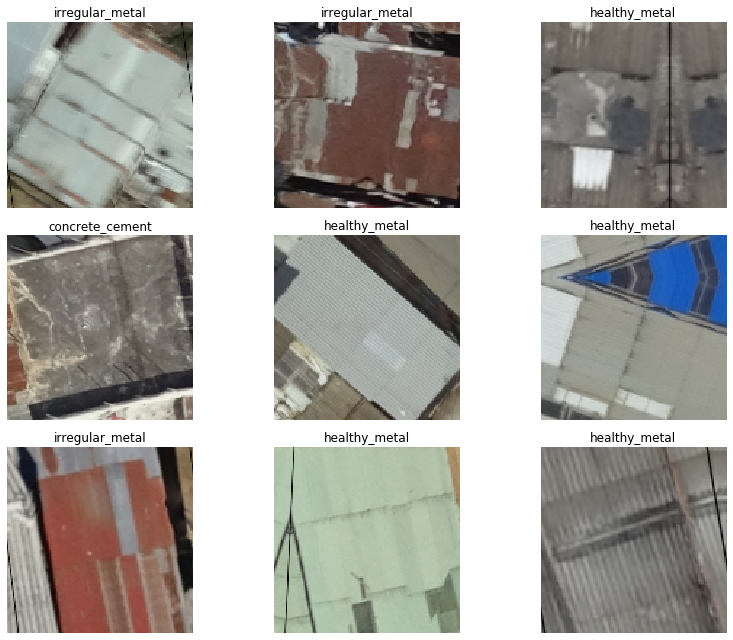

In [5]:
data.show_batch(rows=3, figsize=(12,9))

In [6]:
print(data.classes)
#data.save('databunch1')

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']


In [8]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/cupgreek/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [12:28<00:00, 239kB/s]    


In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.fit_one_cycle(4, callbacks=[SaveModelCallback(learn)])

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('stage-1 v1 -50')

In [ ]:
pwd

In [ ]:
learn.fit_one_cycle(2, callbacks=[SaveModelCallback(learn)])

In [ ]:
img = learn.data.test_ds[0][0]
print(np.array(learn.predict(img)[2]))

In [ ]:
learn.data.test_ds[0][0]

In [ ]:
preds, y = learn.get_preds(DatasetType.Test)

In [ ]:
import pandas as pd
df_test = pd.read_csv('testResults.csv')

In [ ]:
df_test.head()

In [ ]:
for i in range(len(df_test)):
  img = open_image('data_processed/test/'+df_test['id'][i]+'.tif')
  ar = np.array(learn.predict(img)[2])
  df_test['concrete_cement'][i] = ar[0]
  df_test['healthy_metal'][i] = ar[1]
  df_test['incomplete'][i] = ar[2]
  df_test['irregular_metal'][i] = ar[3]
  df_test['other'][i] = ar[4]

df_test.to_csv('submission1.csv')
